In [1]:
import pandas as pd
import numpy as np
from matplotlib.colors import rgb2hex
import datetime as dt
import matplotlib.pyplot as plt
import cmcrameri.cm as cmc
from scipy.stats import linregress
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
#import matplotlib
#matplotlib.use('TkAgg')

In [2]:
import sys
print("Using Python executable:", sys.executable)
plt.close('all')

Using Python executable: /Users/dagi9522/miniconda3/envs/Aseismic/bin/python


In [4]:
creepmeters = pd.read_csv('../../../Data/DATA_tidied/creepmeter_metadata_post_standardisation_sac_codes_updated.csv')
creepmeters.drop_duplicates('Creepmeter_abbrv',inplace=True)
creepmeters.drop(creepmeters[creepmeters['Creepmeter_abbrv']=='XMBC'].index,inplace=True)
creepmeters.drop(creepmeters[creepmeters['Creepmeter_abbrv']=='TABC'].index,inplace=True)
creepmeters.reset_index(inplace=True,drop=True)

In [5]:
########## East Anatolia ############
EAF = creepmeters.drop(creepmeters[creepmeters["Network"]!="EAF"].index)
EAF.reset_index(inplace=True,drop=True)
EAF.sort_values(by='Latitude',inplace=True,ascending=False)
EAF.reset_index(inplace=True,drop=True)

########## North Anatolia ############
NAF = creepmeters.drop(creepmeters[creepmeters["Network"]!="NAF"].index)
NAF.sort_values(by='Longitude',inplace=True,ascending=True)
NAF.reset_index(inplace=True,drop=True)


########## Parkfield ############
PARK = creepmeters.drop(creepmeters[creepmeters["Network"]!="PARK"].index)
PARK.reset_index(inplace=True,drop=True)
PARK.sort_values(by='Latitude',inplace=True,ascending=False)
PARK.reset_index(inplace=True,drop=True)
PARK

########## Hayward ############
HAY = creepmeters.drop(creepmeters[creepmeters["Network"]!="HAY"].index)
HAY.sort_values(by='Latitude',inplace=True,ascending=False)
HAY.reset_index(inplace=True,drop=True)
HAY

########## Hollister ############
HOL = creepmeters.drop(creepmeters[creepmeters["Network"]!="HOL"].index)
HOL.reset_index(inplace=True,drop=True)
CAL = creepmeters.drop(creepmeters[creepmeters["Network"]!="CAL"].index)
CAL.reset_index(inplace=True,drop=True)
HOL = pd.concat([HOL,CAL],ignore_index=True)
HOL.sort_values(by='Latitude',inplace=True,ascending=False)
HOL.reset_index(inplace=True,drop=True)

########## Chaman ############
CHAF = creepmeters.drop(creepmeters[creepmeters["Network"]!="CHAF"].index)
CHAF.reset_index(inplace=True,drop=True)

########## Dead Sea ############
DSF = creepmeters.drop(creepmeters[creepmeters["Network"]!="DSF"].index)
DSF.reset_index(inplace=True,drop=True)

########## Utah ############
UTA = creepmeters.drop(creepmeters[creepmeters["Network"]!="UTA"].index)
UTA.reset_index(inplace=True,drop=True)

########## SoCal ############
SOCAL= creepmeters.drop(creepmeters[creepmeters["Network"]!="SOCAL"].index)
SOCAL.sort_values(by='Latitude',inplace=True,ascending=False)
SOCAL.reset_index(inplace=True,drop=True)

########## Ridgecrest ############
RID = creepmeters.drop(creepmeters[creepmeters["Network"]!="RID"].index)
RID.sort_values(by='Latitude',inplace=True,ascending=False)
RID.reset_index(inplace=True,drop=True)

In [6]:
cmap=cmc.managua

In [18]:
df_all = pd.read_csv("../../../Data/DATA_tidied/Picks/All_picks_12_JUN_2025.csv",index_col=0)

df_all['Start Time'] = pd.to_datetime(df_all['Start Time'])
df_all.drop(df_all[df_all['Start Time']>dt.datetime(2024,1,1,0,0,0)].index,inplace=True)
df_all.drop(df_all[df_all['Displacement, mm']<0.02].index,inplace=True)
df_ce = df_all.copy(deep=True)
print(len(df_ce))
print(np.max(df_ce['Duration, hrs']))
print(np.max(df_ce['Displacement, mm']))
df_creeplet = df_ce.drop(df_ce[abs(df_ce['Displacement, mm'])>0.1].index)
df_surge = df_ce.drop(df_ce[df_ce['Duration, hrs']<720].index)
df_creeplet.drop(df_creeplet[df_creeplet['Duration, hrs']>720].index,inplace=True)
df_creeplet.drop(df_creeplet[df_creeplet['Displacement, mm']<0.02].index,inplace=True)
print('creeplet no',len(df_creeplet),'med dur',np.median(df_creeplet['Duration, hrs']),'dis',np.median(df_creeplet['Displacement, mm']))
print('surge no',len(df_surge),'med dur', np.median(df_surge['Duration, hrs']),'dis',np.median(df_surge['Displacement, mm']))
df_ce.drop(df_ce[df_ce['Duration, hrs']>720].index,inplace=True)
df_ce.drop(df_ce[df_ce['Displacement, mm']<0.1].index,inplace=True)
print('creep events', len(df_ce),'med dur', np.median(df_ce['Duration, hrs']),'dis',np.median(df_ce['Displacement, mm']))
colours  = cmap(np.linspace(0, 1, 10))

5695
30253.33361111111
26.82999000000001
creeplet no 1063 med dur 9.68361111111111 dis 0.0561442784262133
surge no 207 med dur 1322.1663888888888 dis 1.6400000000000006
creep events 4428 med dur 29.95847222222222 dis 0.4600000000000008


In [8]:
#df_creeplet.to_csv('../../Data/DATA_tidied/creeplets.csv')
#df_surge.to_csv('../../Data/DATA_tidied/surge.csv')

In [9]:
# Start with no group label
df_all['event_type'] = np.nan

# Define conditions for each group, same as your logic

# Creeplets: Duration ≤ 720 hrs, Displacement between 0.02 mm and 0.1 mm
cond_creeplet = (
    (df_all['Duration, hrs'] <= 720) &
    (df_all['Displacement, mm'] >= 0.02) &
    (df_all['Displacement, mm'] <= 0.1)
)

# Surges: Duration ≥ 720 hrs (you didn't filter displacement here explicitly)
cond_surge = (
    (df_all['Duration, hrs'] >= 720)
)

# Creep Events: Duration ≤ 720 hrs, Displacement ≥ 0.1 mm
cond_creep_event = (
    (df_all['Duration, hrs'] <= 720) &
    (df_all['Displacement, mm'] >= 0.1)
)

# Assign group labels based on conditions
df_all.loc[cond_creeplet, 'event_type'] = 'creeplet'
df_all.loc[cond_surge, 'event_type'] = 'surge'
df_all.loc[cond_creep_event, 'event_type'] = 'creep_event'

# Optional: If any rows don't fit these categories, you can assign 'other' or leave as NaN
df_all['event_type'] = df_all['event_type'].fillna('other')

# Check counts
print(df_all['event_type'].value_counts())

event_type
creep_event    4446
creeplet       1042
surge           207
Name: count, dtype: int64


/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_77939/1368056339.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'creeplet' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_all.loc[cond_creeplet, 'event_type'] = 'creeplet'


/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_77939/564701528.py:42: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([0,20])


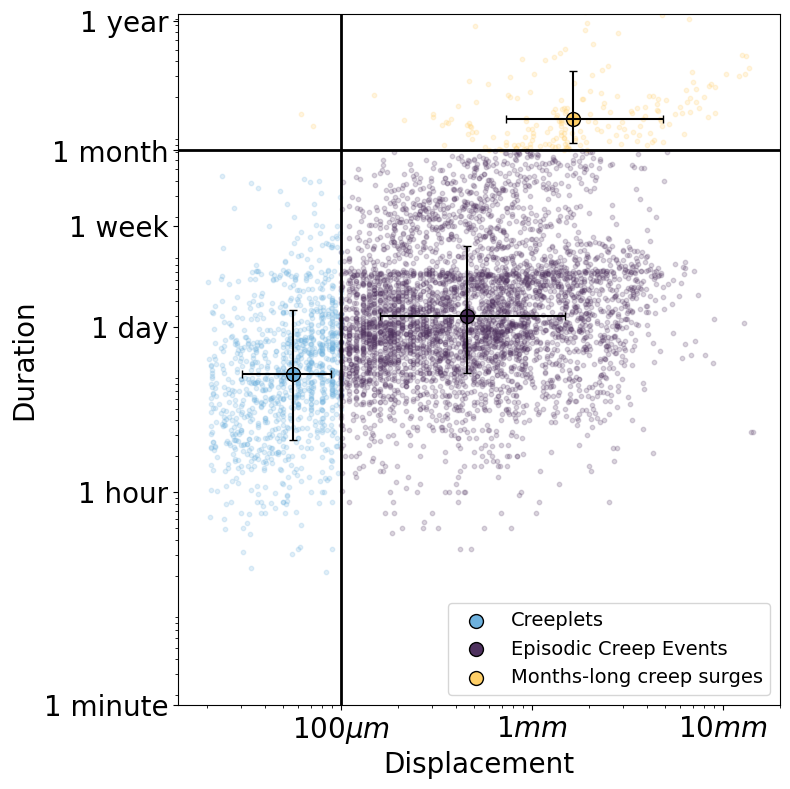

In [10]:
plt.figure(figsize=(8,8))
axis = plt.subplot(1,1,1)
plt.scatter(df_creeplet['Displacement, mm'],df_creeplet['Duration, hrs'],color = rgb2hex(colours[8]),s=10,alpha=0.2)
axis.errorbar(np.median(df_creeplet['Displacement, mm']), np.median(df_creeplet['Duration, hrs']),
              yerr=[[np.median(df_creeplet['Duration, hrs'])-np.percentile(df_creeplet['Duration, hrs'],15)],
                    [np.percentile(df_creeplet['Duration, hrs'],85)-np.median(df_creeplet['Duration, hrs'])]], 
              xerr=[[np.median(df_creeplet['Displacement, mm'])-np.percentile(df_creeplet['Displacement, mm'],15)],
                    [np.percentile(df_creeplet['Displacement, mm'],85)-np.median(df_creeplet['Displacement, mm'])]], 
                    fmt='none', ecolor='k', capsize=3)
plt.scatter(np.median(df_creeplet['Displacement, mm']),np.median(df_creeplet['Duration, hrs']),color = rgb2hex(colours[8]),
            label = 'Creeplets',s=100,edgecolors='k')

plt.scatter(df_ce['Displacement, mm'],df_ce['Duration, hrs'],color = rgb2hex(colours[5]),s=10,alpha=0.2)
axis.errorbar(np.median(df_ce['Displacement, mm']), np.median(df_ce['Duration, hrs']),
              yerr=[[np.median(df_ce['Duration, hrs'])-np.percentile(df_ce['Duration, hrs'],15)],
                    [np.percentile(df_ce['Duration, hrs'],85)-np.median(df_ce['Duration, hrs'])]], 
              xerr=[[np.median(df_ce['Displacement, mm'])-np.percentile(df_ce['Displacement, mm'],15)],
                    [np.percentile(df_ce['Displacement, mm'],85)-np.median(df_ce['Displacement, mm'])]], 
                    fmt='none', ecolor='k', capsize=3)
plt.scatter(np.median(df_ce['Displacement, mm']),np.median(df_ce['Duration, hrs']),color = rgb2hex(colours[5]),
            label = 'Episodic Creep Events',s=100,edgecolors='k')

plt.scatter(df_surge['Displacement, mm'],df_surge['Duration, hrs'],color = rgb2hex(colours[0]),s=10,alpha=0.2)
axis.errorbar(np.median(df_surge['Displacement, mm']), np.median(df_surge['Duration, hrs']),
              yerr=[[np.median(df_surge['Duration, hrs'])-np.percentile(df_surge['Duration, hrs'],15)],
                    [np.percentile(df_surge['Duration, hrs'],85)-np.median(df_surge['Duration, hrs'])]], 
              xerr=[[np.median(df_surge['Displacement, mm'])-np.percentile(df_surge['Displacement, mm'],15)],
                    [np.percentile(df_surge['Displacement, mm'],85)-np.median(df_surge['Displacement, mm'])]], 
                    fmt='none', ecolor='k', capsize=3)
plt.scatter(np.median(df_surge['Displacement, mm']),np.median(df_surge['Duration, hrs']),color = rgb2hex(colours[0]),label = 'Months-long creep surges',s=100,edgecolors='k')

plt.yscale('log')
plt.xscale('log')
plt.xlabel('Displacement',fontsize=20)
plt.ylabel('Duration',fontsize=20) 
axis.set_yticks([1/60, 1, 24, 168,720,8760])
axis.set_xticks([0.01,0.1,1,10])
axis.set_yticklabels(['1 minute','1 hour', '1 day', '1 week','1 month','1 year'],fontsize=20)
axis.set_xticklabels([ r'10$\mu m$', r'100$\mu m$',r'1$mm$',r'10$mm$'],fontsize=20)
plt.vlines(0.1,0,10000,colors='k',linewidth=2)
plt.hlines(720,0,20,colors='k',linewidth=2)
plt.xlim([0,20])
plt.ylim([1/60,10000])

plt.legend(fontsize=14,loc='lower right')
plt.tight_layout()
#plt.savefig('../../Creep_catalog_stats_figures/New Plots/loglog_transients_dur_vs_disp.pdf')
#plt.savefig('../../Creep_catalog_stats_figures/New Plots/loglog_transients_dur_vs_disp.png')
plt.show()

/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_77939/3479677489.py:20: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([0,20])


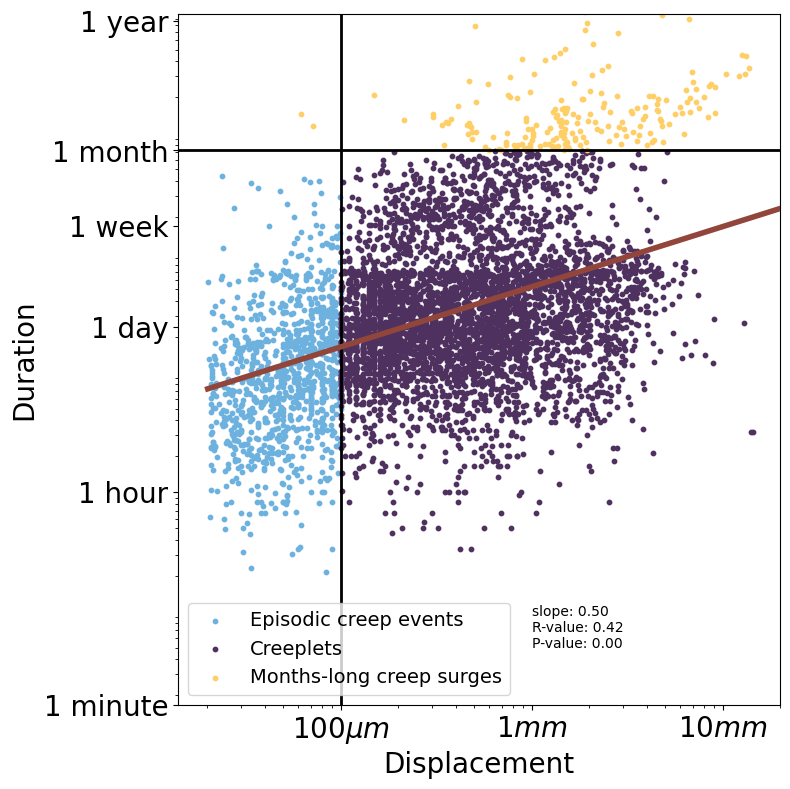

In [11]:
plt.figure(figsize=(8,8))
axis = plt.subplot(1,1,1)
plt.scatter(df_creeplet['Displacement, mm'],df_creeplet['Duration, hrs'],color = rgb2hex(colours[8]),s=10,label='Episodic creep events')


plt.scatter(df_ce['Displacement, mm'],df_ce['Duration, hrs'],color = rgb2hex(colours[5]),s=10,label='Creeplets')


plt.scatter(df_surge['Displacement, mm'],df_surge['Duration, hrs'],color = rgb2hex(colours[0]),s=10,label='Months-long creep surges')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Displacement',fontsize=20)
plt.ylabel('Duration',fontsize=20) 
axis.set_yticks([1/60, 1, 24, 168,720,8760])
axis.set_xticks([0.01,0.1,1,10])
axis.set_yticklabels(['1 minute','1 hour', '1 day', '1 week','1 month','1 year'],fontsize=20)
axis.set_xticklabels([ r'10$\mu m$', r'100$\mu m$',r'1$mm$',r'10$mm$'],fontsize=20)
plt.vlines(0.1,0,10000,colors='k',linewidth=2)
plt.hlines(720,0,20,colors='k',linewidth=2)
plt.xlim([0,20])
plt.ylim([1/60,10000])
plt.legend(fontsize=14)


y = df_all['Duration, hrs']
x = df_all['Displacement, mm']



# Take log10 of both axes
log_x = np.log10(x)
log_y = np.log10(y)

# Perform linear regression on log-log data
result = linregress(log_x, log_y)
slope = result.slope
intercept = result.intercept

# Best-fit line in log space
log_x_fit = np.linspace(log_x.min(), log_x.max(), 100)
log_y_fit = slope * log_x_fit + intercept

# Convert back to linear space for plotting
x_fit = 10**log_x_fit
y_fit = 10**log_y_fit

plt.plot(x_fit, y_fit, color=colours[3],linewidth=4,zorder=10)
plt.text(1,0.05,f"slope: {slope:.2f}\nR-value: {result.rvalue:.2f}\nP-value: {result.pvalue:.2f}")

plt.tight_layout()
#plt.savefig('../../Creep_catalog_stats_figures/New Plots/loglog_scaling_dur_vs_disp.pdf')
plt.show()

In [12]:
def scatter_points(instrument_dataframe,event_dataframe,axis,cmap,xticks=True,yticks=True):
    axis.set_xscale('log')
    axis.set_yscale('log')
    axis.set_xlim([1/60,10000])
    axis.set_ylim([0,20])
    x = []
    y= []
    total_events = 0
    for i in range(len(instrument_dataframe)):
        abbrv = instrument_dataframe['Creepmeter_abbrv'].iloc[i]
        colours  = cmap(np.linspace(0, 1, len(instrument_dataframe)))
        #print(abbrv)
        try:
            instrument_df = event_dataframe[event_dataframe['Creepmeter abbreviation'] == abbrv]
            total_events = total_events+len(instrument_df)
            print(f'{abbrv} has {len(instrument_df)} events')
            displacement = instrument_df['Displacement, mm']
            duration = instrument_df['Duration, hrs']
            dur_med = np.median(duration)
            dur85 = np.percentile(duration,85)
            dur15 = np.percentile(duration,15)
            disp_med = np.median(displacement)
            disp85 = np.percentile(displacement,85)
            disp15 = np.percentile(displacement,15)
            if abbrv not in ['SU30']:
                y.append(dur_med)
                x.append(disp_med)


            # Asymmetric error bars
            yerr = [[dur_med-dur15], [dur85-dur_med]]
            xerr = [[disp_med-disp15], [disp85-disp_med]]
            #print(xerr,yerr)

            
            axis.errorbar(disp_med,dur_med, xerr=xerr, yerr=yerr, fmt='none', ecolor='k', alpha=0.5, capsize=3)
            if abbrv in ['SU30','XHSW','XRSW','XSH1','DS30']:
                axis.scatter(disp_med,dur_med,s=len(instrument_df),c=rgb2hex(colours[i]),alpha=0.5,edgecolors='k',marker='s')
                axis.scatter([],[],c=colours[i],alpha=0.5,label=abbrv,edgecolors='k',marker='s')
            elif abbrv in ['RR45','CHA1']:
                axis.scatter(disp_med,dur_med,s=len(instrument_df),c=rgb2hex(colours[i]),alpha=0.5,edgecolors='k',marker='^')
                axis.scatter([],[],c=colours[i],alpha=0.5,label=abbrv,edgecolors='k',marker='^')
            elif abbrv in ['SH30','CAN1']:
                axis.scatter(disp_med,dur_med,s=len(instrument_df),c=rgb2hex(colours[i]),alpha=0.5,edgecolors='k',marker='D')
                axis.scatter([],[],c=colours[i],alpha=0.5,label=abbrv,edgecolors='k',marker='D')
            else:
                axis.scatter(disp_med,dur_med,s=len(instrument_df),c=rgb2hex(colours[i]),alpha=0.5,edgecolors='k')
                axis.scatter([],[],c=colours[i],alpha=0.5,label=abbrv,edgecolors='k')
                
            
        

        except IndexError:
            print('no events')

    # Take log10 of both axes
    log_x = np.log10(x)
    log_y = np.log10(y)

    # Perform linear regression on log-log data
    result = linregress(log_x, log_y)
    slope = result.slope
    intercept = result.intercept

    # Best-fit line in log space
    log_x_fit = np.linspace(log_x.min(), log_x.max(), 100)
    log_y_fit = slope * log_x_fit + intercept

    # Convert back to linear space for plotting
    x_fit = 10**log_x_fit
    y_fit = 10**log_y_fit
    #if abbrv not in ['CFW1','CAN1']:
    # Plot the best-fit line
        #plt.plot(x_fit, y_fit, color="k",linewidth=2,zorder=10)
        #plt.text(6,168,f"slope: {slope:.2f}\nR-value: {result.rvalue:.2f}\nP-value: {result.pvalue:.2f}")

    # First legend (Color & Marker Style) - Automatically created by seaborn/matplotlib
    legend1 = plt.legend(title="Instrument", loc="upper left", frameon=True,fontsize=10)

    # Define representative event counts for the size legend
    size_legend_values = [10, 100, 500, 1000]  # Adjust as needed
    size_legend_labels = [f'{val} Events' for val in size_legend_values]


    # Create properly sized legend markers
    size_legend_handles = [
        axis.scatter([], [], s=size, color='gray', label=label, alpha=0.6, edgecolors='k')
        for size, label in zip(size_legend_values, size_legend_labels)]
    if instrument_dataframe['Network'].iloc[0] in ['HAY']:
        legend2 = plt.legend(
            handles=size_legend_handles, title='Number of Events',
            loc='lower left', frameon=True, labelspacing=1.75, borderpad=1.2, scatterpoints=1
        )
        plt.gca().add_artist(legend2)  # Add the second legend

    # Add both legends
    plt.gca().add_artist(legend1)  # Keep the first legend
    
    # Set custom tick positions
    if yticks== True:
        axis.set_yticks([1/60,1, 24, 168,720,8760])
        axis.set_yticklabels(['1 minute','1 hour', '1 day', '1 week','1 month','1 year'])
        axis.set_ylabel('Duration')
    
    else:
        axis.set_yticks([1/60,1, 24, 168,720,8760])
        axis.set_yticklabels(['', '', '','',''])
        
    if xticks == True:
        axis.set_xticks([0.01,0.1,1,10])
        axis.set_xticklabels([ r'10$\mu m$', r'100$\mu m$',r'1$mm$',r'10$mm$'])
        axis.set_xlabel('Displacement')
    else:
        axis.set_xticks([0.01,0.1,1,10])
        axis.set_xticklabels([ '', '','',''],fontsize=20)

    plt.xlim([0,20])
    plt.ylim([1/60,10000])
    plt.text(0.015,168,f'{total_events} events')
    return

/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_77939/2851850919.py:5: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axis.set_ylim([0,20])
/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_77939/2851850919.py:48: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axis.scatter([],[],c=colours[i],alpha=0.5,label=abbrv,edgecolors='k')
/Users/dagi9522/miniconda3/envs/Aseismic/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/dagi9522/miniconda3/envs/Aseismic/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encount

CPP1 has 2 events
CTM1 has 28 events
COZ1 has 168 events
CHP1 has 0 events
no events
CFW1 has 288 events
XSH1 has 43 events
SJN1 has 101 events
XSJ2 has 76 events
XSJ3 has 70 events
XHR1 has 23 events
XHR2 has 99 events
XHR3 has 90 events
CWC3 has 70 events
CWN1 has 215 events
FCR1 has 34 events
XMR1 has 302 events
XSC1 has 91 events
XMM1 has 1044 events
XMD1 has 449 events
XVA1 has 315 events
XRSW has 37 events
XPK1 has 135 events
XPK2 has 138 events
XTA1 has 203 events
XHSW has 69 events
WKR1 has 158 events
CRR1 has 139 events
XGH1 has 88 events
C461 has 43 events
C462 has 24 events
X461 has 146 events
COML has 0 events
no events
QW30 has 4 events
QE30 has 9 events
IR30 has 0 events
no events
NS45 has 5 events
FE30 has 12 events
SC30 has 63 events
DU30 has 54 events
SH30 has 15 events
EASH has 1 events
SU30 has 26 events
RR45 has 40 events
COLE has 0 events
no events
COLW has 1 events
SEL1 has 13 events
TEP1 has 14 events
PET1 has 12 events
WSZ1 has 52 events
ESZ1 has 31 events
INW1 

/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_77939/2851850919.py:117: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([0,20])
/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_77939/2851850919.py:5: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axis.set_ylim([0,20])
/Users/dagi9522/miniconda3/envs/Aseismic/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/dagi9522/miniconda3/envs/Aseismic/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_77939/2851850919.py:48: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length

HAT1 has 7 events
ORM1 has 5 events
TAS1 has 4 events
YZE1 has 1 events
GOZ1 has 1 events
YZW1 has 10 events
KAR1 has 0 events
no events
GOK1 has 130 events
BAL1 has 8 events
HAS1 has 8 events
KIR1 has 6 events
DS30 has 16 events
CHA1 has 4 events
CAN1 has 6 events


/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_77939/2851850919.py:117: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([0,20])
/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_77939/2851850919.py:5: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axis.set_ylim([0,20])
/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_77939/2851850919.py:39: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axis.scatter([],[],c=colours[i],alpha=0.5,label=abbrv,edgecolors='k',marker='s')
/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_77939/2851850919.py:42: UserWarning: *c* argument looks like a singl

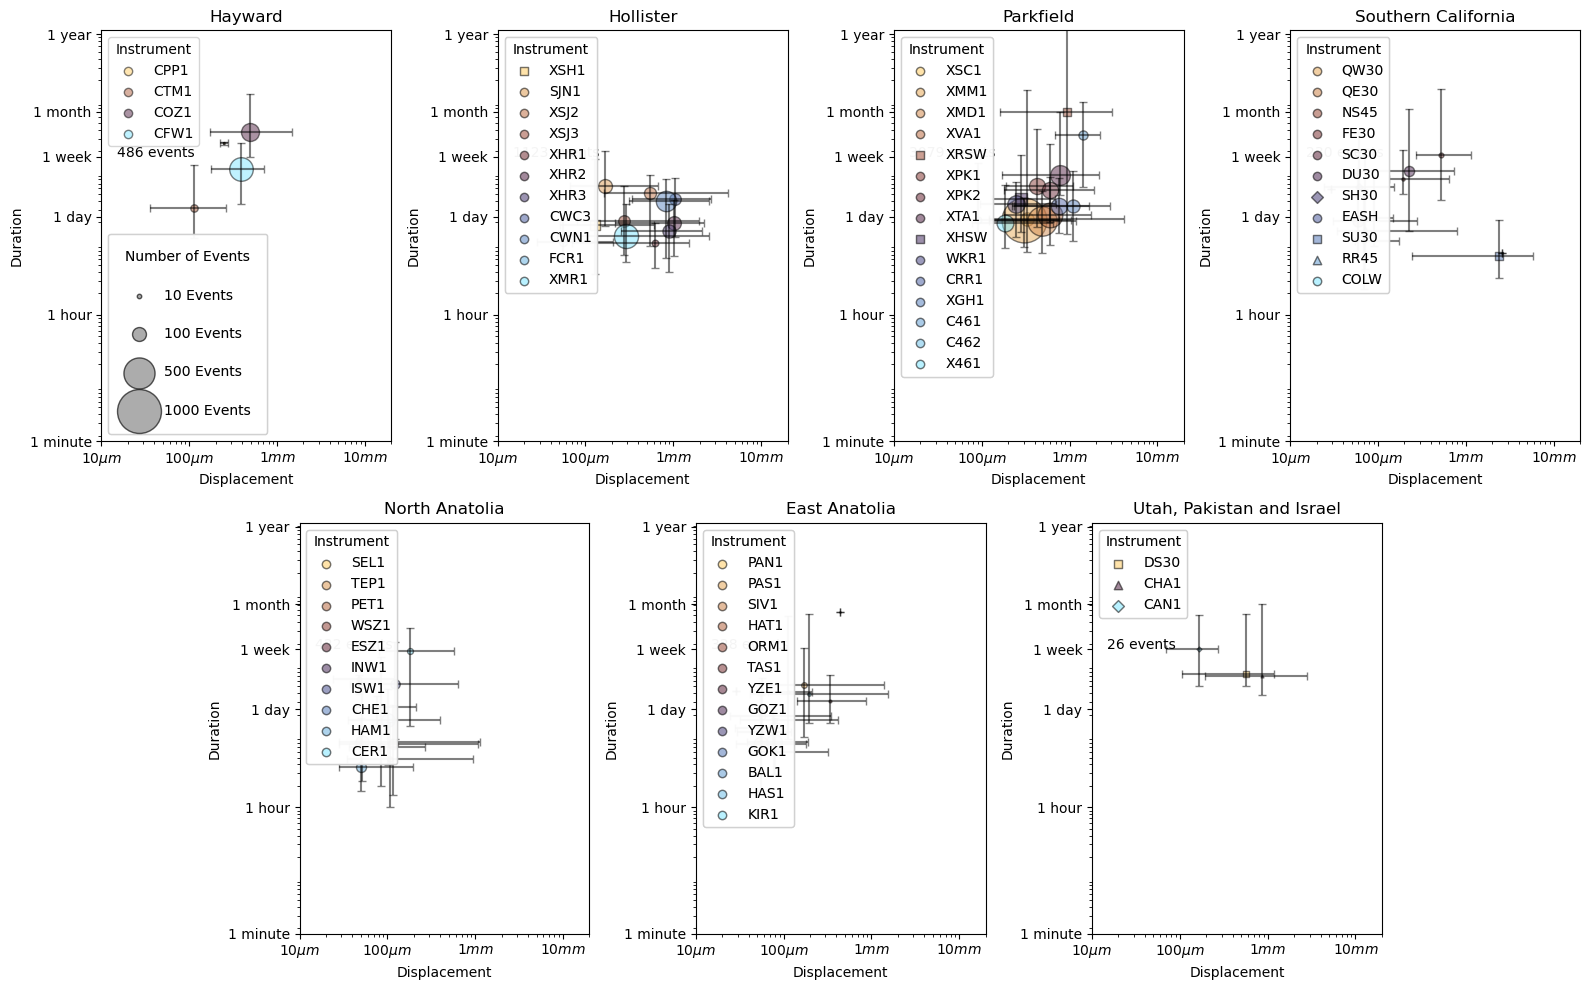

In [13]:
#df_all = pd.read_csv("../../Data/DATA_tidied/Picks/All_picks_29_May_2025.csv",index_col=0)
fig = plt.figure(figsize=(16,10))
axa = plt.subplot2grid((4, 8), (0, 0), colspan=2,rowspan=2)
axa.set_title("Hayward")
scatter_points(HAY,df_all,axa,cmap,xticks=True,yticks=True)
axb = plt.subplot2grid((4, 8), (0, 2), colspan=2, rowspan=2)
axb.set_title("Hollister")
scatter_points(HOL,df_all,axb,cmap,xticks=True,yticks=True)  
axc = plt.subplot2grid((4, 8), (0, 4), colspan=2, rowspan=2) 
axc.set_title("Parkfield")
scatter_points(PARK,df_all,axc,cmap,xticks=True,yticks=True) 
axd = plt.subplot2grid((4, 8), (0, 6), colspan=2, rowspan=2)
axd.set_title("Southern California")
scatter_points(SOCAL,df_all,axd,cmap,xticks=True,yticks=True)
axe = plt.subplot2grid((4, 8), (2, 1), colspan=2, rowspan=2) 
axe.set_title("North Anatolia")  
scatter_points(NAF,df_all,axe,cmap,xticks=True,yticks=True)         
axf = plt.subplot2grid((4, 8), (2, 3), colspan=2, rowspan=2) 
axf.set_title("East Anatolia")
scatter_points(EAF,df_all,axf,cmap,xticks=True,yticks=True) 
axg = plt.subplot2grid((4, 8), (2, 5), colspan=2, rowspan=2)
axg.set_title("Utah, Pakistan and Israel")
others = pd.concat([DSF,CHAF,UTA])
scatter_points(others,df_all,axg,cmap,xticks=True,yticks=True) 
fig.tight_layout()
#plt.savefig('../../Creep_catalog_stats_figures/duration_vs_displacement_regions.pdf')
plt.show()

In [14]:
def scatter_points_events(instrument_dataframe,event_dataframe,axis,cmap,xticks=True,yticks=True):
    axis.set_xscale('log')
    axis.set_yscale('log')
    axis.set_xlim([1/60,10000])
    axis.set_ylim([0,20])
    x = []
    y= []
    total_events = 0
    for i in range(len(instrument_dataframe)):
        abbrv = instrument_dataframe['Creepmeter_abbrv'].iloc[i]
        colours  = cmap(np.linspace(0, 1, len(instrument_dataframe)))
        #print(abbrv)
        try:
            instrument_df = event_dataframe[event_dataframe['Creepmeter abbreviation'] == abbrv]
            total_events = total_events+len(instrument_df)
            print(f'{abbrv} has {len(instrument_df)} events')
            displacement = instrument_df['Displacement, mm']
            duration = instrument_df['Duration, hrs']

            
            if abbrv in ['SU30','XHSW','XRSW','XSH1','DS30']:
                axis.scatter(displacement,duration,s=5,c=rgb2hex(colours[i]),alpha=0.5,edgecolors='k',marker='s')
                axis.scatter([],[],c=colours[i],alpha=0.5,label=abbrv,edgecolors='k',marker='s')
            elif abbrv in ['RR45','CHA1']:
                axis.scatter(displacement,duration,s=5,c=rgb2hex(colours[i]),alpha=0.5,edgecolors='k',marker='^')
                axis.scatter([],[],c=colours[i],alpha=0.5,label=abbrv,edgecolors='k',marker='^')
            elif abbrv in ['SH30','CAN1']:
                axis.scatter(displacement,duration,s=5,c=rgb2hex(colours[i]),alpha=0.5,edgecolors='k',marker='D')
                axis.scatter([],[],c=colours[i],alpha=0.5,label=abbrv,edgecolors='k',marker='D')
            else:
                axis.scatter(displacement,duration,s=5,c=rgb2hex(colours[i]),alpha=0.5,edgecolors='k')
                axis.scatter([],[],c=colours[i],alpha=0.5,label=abbrv,edgecolors='k')
                
            
        

        except IndexError:
            print('no events')

    

    # First legend (Color & Marker Style) - Automatically created by seaborn/matplotlib
    legend1 = plt.legend(title="Instrument", loc="upper left", frameon=True,fontsize=10)




    # Add both legends
    plt.gca().add_artist(legend1)  # Keep the first legend
    
    # Set custom tick positions
    if yticks== True:
        axis.set_yticks([1/60,1, 24, 168,720,8760])
        axis.set_yticklabels(['1 minute','1 hour', '1 day', '1 week','1 month','1 year'])
        axis.set_ylabel('Duration')
    
    else:
        axis.set_yticks([1/60,1, 24, 168,720,8760])
        axis.set_yticklabels(['', '', '','',''])
        
    if xticks == True:
        axis.set_xticks([0.01,0.1,1,10])
        axis.set_xticklabels([ r'10$\mu m$', r'100$\mu m$',r'1$mm$',r'10$mm$'])
        axis.set_xlabel('Displacement')
    else:
        axis.set_xticks([0.01,0.1,1,10])
        axis.set_xticklabels([ '', '','',''],fontsize=20)

    plt.xlim([0,20])
    plt.ylim([1/60,10000])
    plt.text(0.015,168,f'{total_events} events')
    return

/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_77939/4235053922.py:5: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axis.set_ylim([0,20])
/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_77939/4235053922.py:32: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axis.scatter([],[],c=colours[i],alpha=0.5,label=abbrv,edgecolors='k')
/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_77939/4235053922.py:69: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([0,20])
/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_77939/4235053922.py:5: UserWarning: Attempt to set non-positive ylim on a log-sc

CPP1 has 2 events
CTM1 has 28 events
COZ1 has 168 events
CHP1 has 0 events
CFW1 has 288 events
XSH1 has 43 events
SJN1 has 101 events
XSJ2 has 76 events
XSJ3 has 70 events
XHR1 has 23 events
XHR2 has 99 events
XHR3 has 90 events
CWC3 has 70 events
CWN1 has 215 events
FCR1 has 34 events
XMR1 has 302 events
XSC1 has 91 events
XMM1 has 1044 events
XMD1 has 449 events
XVA1 has 315 events
XRSW has 37 events
XPK1 has 135 events
XPK2 has 138 events
XTA1 has 203 events
XHSW has 69 events
WKR1 has 158 events
CRR1 has 139 events
XGH1 has 88 events
C461 has 43 events
C462 has 24 events
X461 has 146 events
COML has 0 events
QW30 has 4 events
QE30 has 9 events
IR30 has 0 events
NS45 has 5 events
FE30 has 12 events
SC30 has 63 events
DU30 has 54 events
SH30 has 15 events
EASH has 1 events
SU30 has 26 events
RR45 has 40 events
COLE has 0 events
COLW has 1 events
SEL1 has 13 events
TEP1 has 14 events
PET1 has 12 events
WSZ1 has 52 events
ESZ1 has 31 events
INW1 has 91 events
ISW1 has 46 events
CHE1 ha

/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_77939/4235053922.py:69: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([0,20])
/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_77939/4235053922.py:5: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axis.set_ylim([0,20])
/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_77939/4235053922.py:23: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axis.scatter([],[],c=colours[i],alpha=0.5,label=abbrv,edgecolors='k',marker='s')
/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_77939/4235053922.py:26: UserWarning: *c* argument looks like a single

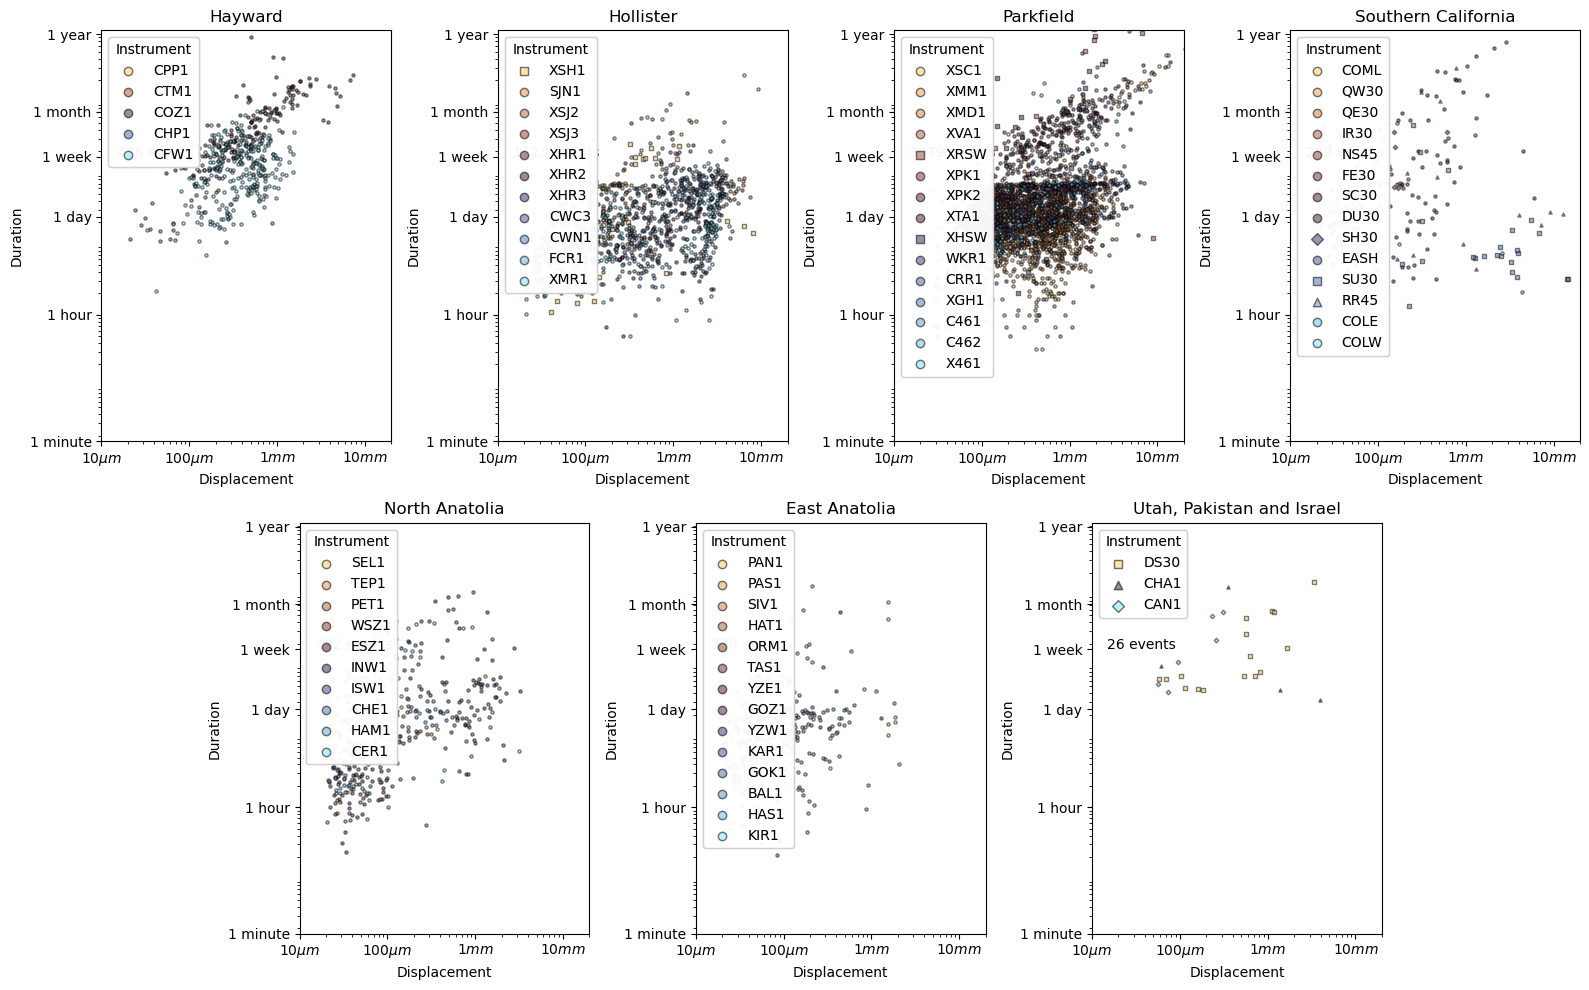

In [15]:
#df_all = pd.read_csv("../../Data/DATA_tidied/Picks/All_picks_12_JUN_2025.csv",index_col=0)
fig = plt.figure(figsize=(16,10))
axa = plt.subplot2grid((4, 8), (0, 0), colspan=2,rowspan=2)
axa.set_title("Hayward")
scatter_points_events(HAY,df_all,axa,cmap,xticks=True,yticks=True)
axb = plt.subplot2grid((4, 8), (0, 2), colspan=2, rowspan=2)
axb.set_title("Hollister")
scatter_points_events(HOL,df_all,axb,cmap,xticks=True,yticks=True)  
axc = plt.subplot2grid((4, 8), (0, 4), colspan=2, rowspan=2) 
axc.set_title("Parkfield")
scatter_points_events(PARK,df_all,axc,cmap,xticks=True,yticks=True) 
axd = plt.subplot2grid((4, 8), (0, 6), colspan=2, rowspan=2)
axd.set_title("Southern California")
scatter_points_events(SOCAL,df_all,axd,cmap,xticks=True,yticks=True)
axe = plt.subplot2grid((4, 8), (2, 1), colspan=2, rowspan=2) 
axe.set_title("North Anatolia")  
scatter_points_events(NAF,df_all,axe,cmap,xticks=True,yticks=True)         
axf = plt.subplot2grid((4, 8), (2, 3), colspan=2, rowspan=2) 
axf.set_title("East Anatolia")
scatter_points_events(EAF,df_all,axf,cmap,xticks=True,yticks=True) 
axg = plt.subplot2grid((4, 8), (2, 5), colspan=2, rowspan=2)
axg.set_title("Utah, Pakistan and Israel")
others = pd.concat([DSF,CHAF,UTA])
scatter_points_events(others,df_all,axg,cmap,xticks=True,yticks=True) 
fig.tight_layout()
#plt.savefig('../../Creep_catalog_stats_figures/duration_vs_displacement_regions.pdf')
plt.show()

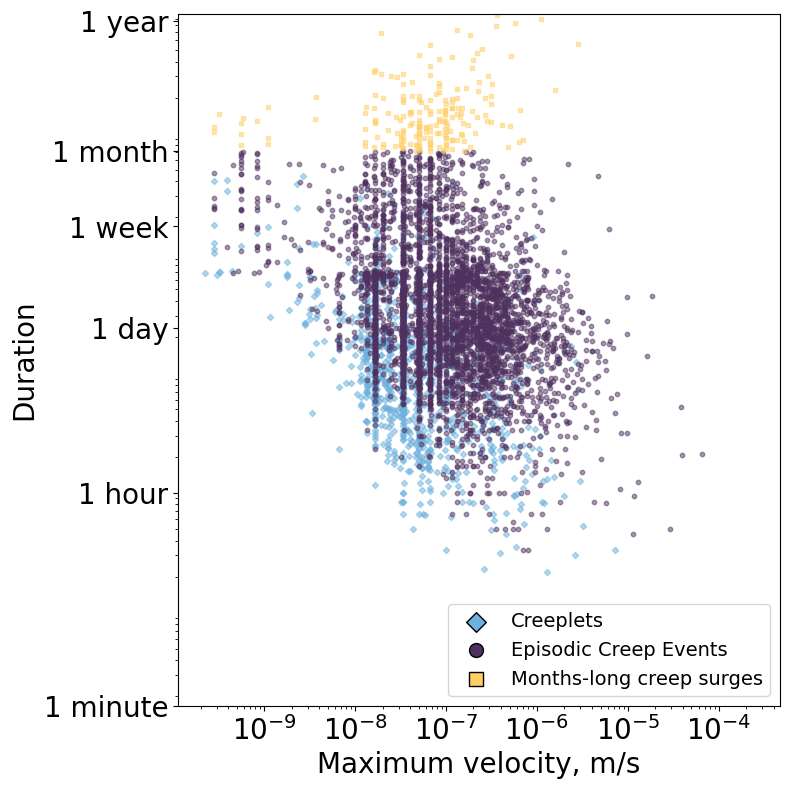

In [19]:
plt.figure(figsize=(8,8))
axis = plt.subplot(1,1,1)
plt.scatter(df_creeplet['Maximum velocity, m/s'],df_creeplet['Duration, hrs'],color = rgb2hex(colours[8]),s=10,alpha=0.5,marker='D')

plt.scatter([],[],color = rgb2hex(colours[8]),label = 'Creeplets',s=100,edgecolors='k',marker='D')

plt.scatter(df_ce['Maximum velocity, m/s'],df_ce['Duration, hrs'],color = rgb2hex(colours[5]),s=10,alpha=0.5,marker='o')

plt.scatter([],[],color = rgb2hex(colours[5]),label = 'Episodic Creep Events',s=100,edgecolors='k',marker='o')

plt.scatter(df_surge['Maximum velocity, m/s'],df_surge['Duration, hrs'],color = rgb2hex(colours[0]),s=10,alpha=0.5,marker='s')

plt.scatter([],[],color = rgb2hex(colours[0]),label = 'Months-long creep surges',s=100,edgecolors='k',marker='s')

plt.yscale('log')
plt.xscale('log')
plt.xlabel('Maximum velocity, m/s',fontsize=20)
plt.ylabel('Duration',fontsize=20) 
axis.set_yticks([1/60, 1, 24, 168,720,8760])
#axis.set_xticks([0.01,0.1,1,10])
axis.set_yticklabels(['1 minute','1 hour', '1 day', '1 week','1 month','1 year'],fontsize=20)
#axis.set_xticklabels([ r'10$\mu m$', r'100$\mu m$',r'1$mm$',r'10$mm$'],fontsize=20)
#plt.xlim([0,20])
plt.ylim([1/60,10000])
plt.xticks(fontsize=20)

plt.legend(fontsize=14,loc='lower right')
plt.tight_layout()


#plt.savefig('../../Creep_catalog_stats_figures/New Plots/loglog_transients_vel_vs_dur.pdf')
plt.show()

In [21]:
print(np.median(df_surge['Maximum velocity, m/s']),np.percentile(df_surge['Maximum velocity, m/s'],15),np.percentile(df_surge['Maximum velocity, m/s'],85))

6.666666666667118e-08 2.0399709511368753e-08 1.9549999999999616e-07


In [26]:
np.median(df_surge['Maximum velocity, m/s'])/((33/1000)/(365.25*24*3600))

63.75272727273158

In [16]:
def linregress_to_plot(x,y):
    # Take log10 of both axes
    log_x = np.log10(x)
    log_y = np.log10(y)

    # Perform linear regression on log-log data
    result = linregress(log_x, log_y)
    slope = result.slope
    intercept = result.intercept

    # Best-fit line in log space
    log_x_fit = np.linspace(log_x.min(), log_x.max(), 100)
    log_y_fit = slope * log_x_fit + intercept

    # Convert back to linear space for plotting
    x_fit = 10**log_x_fit
    y_fit = 10**log_y_fit
    return x_fit, y_fit, slope,intercept

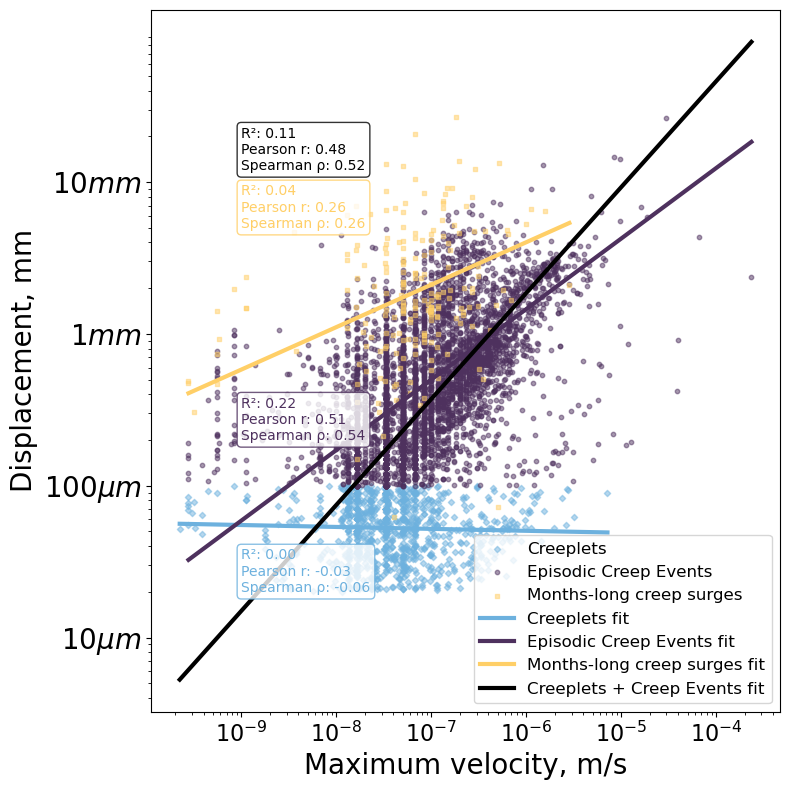

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.odr import ODR, Model, RealData
from scipy.stats import spearmanr, pearsonr

def odr_powerlaw_fit(x, y):
    def f(B, x):
        return B[0] + B[1] * x

    mask = (x > 0) & (y > 0)
    x = x[mask]
    y = y[mask]

    log_x = np.log10(x)
    log_y = np.log10(y)

    data = RealData(log_x, log_y)
    model = Model(f)
    odr = ODR(data, model, beta0=[0., 1.])
    out = odr.run()
    intercept_odr, slope_odr = out.beta

    log_x_fit = np.linspace(log_x.min(), log_x.max(), 100)
    log_y_fit = intercept_odr + slope_odr * log_x_fit

    x_fit = 10**log_x_fit
    y_fit = 10**log_y_fit

    ss_res = np.sum((log_y - (intercept_odr + slope_odr * log_x))**2)
    ss_tot = np.sum((log_y - np.mean(log_y))**2)
    r_squared = 1 - ss_res / ss_tot

    r_pearson, _ = pearsonr(log_x, log_y)
    r_spearman, _ = spearmanr(log_x, log_y)

    return x_fit, y_fit, slope_odr, intercept_odr, out.res_var, r_squared, r_pearson, r_spearman

def add_stat_text(ax, xpos, ypos, stats, colour):
    textstr = (f"R²: {stats['r2']:.2f}\n"
               f"Pearson r: {stats['pearson']:.2f}\n"
               f"Spearman ρ: {stats['spearman']:.2f}")
    bbox = dict(boxstyle="round,pad=0.3", edgecolor=colour, facecolor="white", alpha=0.8)
    ax.text(xpos, ypos, textstr, fontsize=10, color=colour, bbox=bbox)

# Plotting setup
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xscale('log')
ax.set_yscale('log')

# Scatter points
ax.scatter(df_creeplet['Maximum velocity, m/s'], df_creeplet['Displacement, mm'], 
           color=colours[8], s=10, alpha=0.5, marker='D', label='Creeplets')
ax.scatter(df_ce['Maximum velocity, m/s'], df_ce['Displacement, mm'], 
           color=colours[5], s=10, alpha=0.5, marker='o', label='Episodic Creep Events')
ax.scatter(df_surge['Maximum velocity, m/s'], df_surge['Displacement, mm'], 
           color=colours[0], s=10, alpha=0.5, marker='s', label='Months-long creep surges')

# Combined dataset
df_CE_creeplet = pd.concat([df_creeplet, df_ce])

# Fit lines
datasets = [
    ('Creeplets', df_creeplet, colours[8], 1e-9, 0.02),
    ('Episodic Creep Events', df_ce, colours[5], 1e-9, 0.2),
    ('Months-long creep surges', df_surge, colours[0], 1e-9, 5),
    ('Creeplets + Creep Events', df_CE_creeplet, 'k', 1e-9, 12),
]

for label, df, colour, xpos, ypos in datasets:
    x_fit, y_fit, slope, intercept, res_var, r2, pearson_r, spearman_r = odr_powerlaw_fit(
        df['Maximum velocity, m/s'], df['Displacement, mm'])
    ax.plot(x_fit, y_fit, color=colour, linewidth=3, label=f'{label} fit')
    stats = {
        'slope': slope, 'intercept': intercept, 'r2': r2,
        'pearson': pearson_r, 'spearman': spearman_r
    }
    add_stat_text(ax, xpos, ypos, stats, colour)

# Axes and legend
ax.set_xlabel('Maximum velocity, m/s', fontsize=20)
ax.set_ylabel('Displacement, mm', fontsize=20)
ax.set_yticks([0.01, 0.1, 1, 10])
ax.set_yticklabels([r'10$\mu m$', r'100$\mu m$', r'1$mm$', r'10$mm$'], fontsize=20)
ax.tick_params(axis='x', labelsize=16)
ax.legend(fontsize=12, loc='lower right')
plt.tight_layout()
plt.show()  # Omitted as requested


In [18]:
def odr_powerlaw_fit_with_stats(x, y):
    from scipy.odr import ODR, Model, RealData
    from scipy.stats import spearmanr, pearsonr
    import numpy as np

    def f(B, x):
        return B[0] + B[1] * x  # log10(y) = B[0] + B[1]*log10(x)

    # Clean and log-transform data
    mask = np.isfinite(x) & np.isfinite(y) & (x > 0) & (y > 0)
    x_clean = x[mask]
    y_clean = y[mask]
    log_x = np.log10(x_clean)
    log_y = np.log10(y_clean)

    # Fit model
    data = RealData(log_x, log_y)
    model = Model(f)
    odr = ODR(data, model, beta0=[0., 1.])
    out = odr.run()

    intercept_odr, slope_odr = out.beta
    res_var = out.res_var

    # Generate fitted line in log space
    log_x_fit = np.linspace(log_x.min(), log_x.max(), 100)
    log_y_fit = f([intercept_odr, slope_odr], log_x_fit)
    x_fit = 10**log_x_fit
    y_fit = 10**log_y_fit

    # Calculate statistics
    ss_res = np.sum((log_y - f([intercept_odr, slope_odr], log_x))**2)
    ss_tot = np.sum((log_y - np.mean(log_y))**2)
    r2 = 1 - ss_res / ss_tot
    pearson_r, pearson_p = pearsonr(log_x, log_y)
    spearman_rho, _ = spearmanr(log_x, log_y)

    return {
        "x_fit": x_fit,
        "y_fit": y_fit,
        "slope": slope_odr,
        "intercept": intercept_odr,
        "res_var": res_var,
        "r2": r2,
        "pearson_r": pearson_r,
        "pearson_p": pearson_p,
        "spearman_rho": spearman_rho,
    }

# Compute fits
fit_results = {}

fit_results["Creeplets"] = odr_powerlaw_fit_with_stats(
    df_creeplet["Maximum velocity, m/s"], df_creeplet["Displacement, mm"]
)

fit_results["Creep Events"] = odr_powerlaw_fit_with_stats(
    df_ce["Maximum velocity, m/s"], df_ce["Displacement, mm"]
)

fit_results["Surges"] = odr_powerlaw_fit_with_stats(
    df_surge["Maximum velocity, m/s"], df_surge["Displacement, mm"]
)

# Combined Creeplets + Creep Events + Surges
fit_results["Combined Transients (clts+ce)"] = odr_powerlaw_fit_with_stats(
    pd.concat([
        df_creeplet["Maximum velocity, m/s"],
        df_ce["Maximum velocity, m/s"],
    ]),
    pd.concat([
        df_creeplet["Displacement, mm"],
        df_ce["Displacement, mm"],
    ])
)

fit_results["Combined Transients (all)"] = odr_powerlaw_fit_with_stats(
    pd.concat([
        df_creeplet["Maximum velocity, m/s"],
        df_ce["Maximum velocity, m/s"],
        df_surge["Maximum velocity, m/s"]
    ]),
    pd.concat([
        df_creeplet["Displacement, mm"],
        df_ce["Displacement, mm"],
        df_surge["Displacement, mm"]
    ])
)

# Print results
for label, stats in fit_results.items():
    print(f"\n=== {label} ===")
    print(f"Slope (b):         {stats['slope']:.3f}")
    print(f"Intercept (log a): {stats['intercept']:.3f}")
    print(f"Residual var:      {stats['res_var']:.3e}")
    print(f"R²:                {stats['r2']:.3f}")
    print(f"Pearson r:         {stats['pearson_r']:.3f} (p = {stats['pearson_p']:.3e})")
    print(f"Spearman ρ:        {stats['spearman_rho']:.3f}")



=== Creeplets ===
Slope (b):         -0.013
Intercept (log a): -1.373
Residual var:      3.710e-02
R²:                0.001
Pearson r:         -0.034 (p = 2.615e-01)
Spearman ρ:        -0.061

=== Creep Events ===
Slope (b):         0.464
Intercept (log a): 2.949
Residual var:      1.120e-01
R²:                0.225
Pearson r:         0.513 (p = 2.960e-295)
Spearman ρ:        0.539

=== Surges ===
Slope (b):         0.280
Intercept (log a): 2.280
Residual var:      1.630e-01
R²:                0.039
Pearson r:         0.258 (p = 1.778e-04)
Spearman ρ:        0.262

=== Combined Transients (clts+ce) ===
Slope (b):         0.698
Intercept (log a): 4.454
Residual var:      1.767e-01
R²:                0.107
Pearson r:         0.480 (p = 4.862e-315)
Spearman ρ:        0.517

=== Combined Transients (all) ===
Slope (b):         0.719
Intercept (log a): 4.639
Residual var:      1.942e-01
R²:                0.051
Pearson r:         0.448 (p = 1.762e-279)
Spearman ρ:        0.495


Clustering

In [19]:
df_all = pd.read_csv("../../Data/DATA_tidied/Picks/All_picks_12_JUN_2025.csv",index_col=0)

df_all['Start Time'] = pd.to_datetime(df_all['Start Time'])
df_all.drop(df_all[df_all['Start Time']>dt.datetime(2024,1,1,0,0,0)].index,inplace=True)
df_all.drop(df_all[df_all['Displacement, mm']<0.02].index,inplace=True)
print(len(df_all))
# Convert 4 * sampling rate from seconds to hours
threshold_hours = 4 * df_all['Sampling rate, s'] / 3600

# Drop rows where Duration, hrs is <= threshold_hours
df_all = df_all[df_all['Duration, hrs'] > threshold_hours].copy()
print(len(df_all))
# Start with no group label
df_all['event_type'] = np.nan

# Define conditions for each group, same as your logic

# Creeplets: Duration ≤ 720 hrs, Displacement between 0.02 mm and 0.1 mm
cond_creeplet = (
    (df_all['Duration, hrs'] <= 720) &
    (df_all['Displacement, mm'] >= 0.02) &
    (df_all['Displacement, mm'] <= 0.1)
)

# Surges: Duration ≥ 720 hrs (you didn't filter displacement here explicitly)
cond_surge = (
    (df_all['Duration, hrs'] >= 720)
)

# Creep Events: Duration ≤ 720 hrs, Displacement ≥ 0.1 mm
cond_creep_event = (
    (df_all['Duration, hrs'] <= 720) &
    (df_all['Displacement, mm'] >= 0.1)
)

# Assign group labels based on conditions
df_all.loc[cond_creeplet, 'event_type'] = 'creeplet'
df_all.loc[cond_surge, 'event_type'] = 'surge'
df_all.loc[cond_creep_event, 'event_type'] = 'creep_event'

# Optional: If any rows don't fit these categories, you can assign 'other' or leave as NaN
df_all['event_type'] = df_all['event_type'].fillna('other')

# Check counts
print(df_all['event_type'].value_counts())

5695
5678
event_type
creep_event    4414
creeplet       1057
surge           207
Name: count, dtype: int64


/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_4103/3677962300.py:37: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'creeplet' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_all.loc[cond_creeplet, 'event_type'] = 'creeplet'


K-means is an unsupervised machine learning algorithm used to automatically group data into clusters based on similarity.

The goal is to partition n observations into k clusters such that each point belongs to the cluster with the nearest mean (called a centroid).

The algorithm starts by randomly selecting k centroids and iteratively refines their positions to minimise the sum of squared distances between each point and its assigned centroid.

It is widely used for pattern discovery, outlier detection, and data segmentation when no labels are available.

n this analysis, K-means clustering is applied to three log-transformed variables:

-Displacement (mm)

-Duration (hrs)

-Maximum velocity (m/s)

Using the base-10 logarithm compresses large ranges and highlights order-of-magnitude differences between events. Clustering in this transformed space helps identify whether distinct types of events (e.g. short fast pulses, long slow surges) emerge naturally, without relying on pre-defined categories.

The resulting cluster labels can be:

-Visualised in 3D

-Mapped back to stations or event types for interpretation

-Used to guide further analysis, such as time evolution, precursors, or spatial patterns

In [20]:
'''def safe_log(df):
    return df[
        (df['Displacement, mm'] > 0) &
        (df['Duration, hrs'] > 0) &
        (df['Maximum velocity, m/s'] > 0)
    ]

df_creeplet_log = safe_log(df_creeplet)
df_ce_log       = safe_log(df_ce)
df_surge_log    = safe_log(df_surge)

cmap = cmc.managua
colours  = cmap(np.linspace(0, 1, 10))
plt.close('all')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Apply log10 to all axes
ax.scatter(
    np.log10(df_creeplet_log['Duration, hrs']),
    np.log10(df_creeplet_log['Displacement, mm']),
    np.log10(df_creeplet_log['Maximum velocity, m/s']),
    facecolors=[colours[8]], s=10, alpha=0.5, marker='D', label='Creeplets'
)

ax.scatter(
    np.log10(df_ce_log['Duration, hrs']),
    np.log10(df_ce_log['Displacement, mm']),
    np.log10(df_ce_log['Maximum velocity, m/s']),
    facecolors=[colours[5]], s=10, alpha=0.5, marker='o', label='Episodic Creep Events'
)

ax.scatter(
    np.log10(df_surge_log['Duration, hrs']),
    np.log10(df_surge_log['Displacement, mm']),
    np.log10(df_surge_log['Maximum velocity, m/s']),
    facecolors=[colours[0]], s=10, alpha=0.5, marker='s', label='Months-long creep surges'
)

ax.set_ylabel(r'$log_{10}(S)$')
ax.set_xlabel(r'$log_{10}(T)$')
ax.set_zlabel(r'$log_{10}(V_{Max})$ (m/s)')
ax.set_yticks([-2, -1, 0, 1])
ax.set_yticklabels([r'10$\mu m$', r'100$\mu m$', r'1$mm$', r'10$mm$'])
ax.set_xticks(np.log10([1/60, 1, 24, 168,720,8760]))
ax.set_xticklabels(['1 minute','1 hour', '1 day', '1 week','1 month','1 year'])
plt.legend()
plt.show()
'''

"def safe_log(df):\n    return df[\n        (df['Displacement, mm'] > 0) &\n        (df['Duration, hrs'] > 0) &\n        (df['Maximum velocity, m/s'] > 0)\n    ]\n\ndf_creeplet_log = safe_log(df_creeplet)\ndf_ce_log       = safe_log(df_ce)\ndf_surge_log    = safe_log(df_surge)\n\ncmap = cmc.managua\ncolours  = cmap(np.linspace(0, 1, 10))\nplt.close('all')\nfig = plt.figure()\nax = fig.add_subplot(111, projection='3d')\n\n# Apply log10 to all axes\nax.scatter(\n    np.log10(df_creeplet_log['Duration, hrs']),\n    np.log10(df_creeplet_log['Displacement, mm']),\n    np.log10(df_creeplet_log['Maximum velocity, m/s']),\n    facecolors=[colours[8]], s=10, alpha=0.5, marker='D', label='Creeplets'\n)\n\nax.scatter(\n    np.log10(df_ce_log['Duration, hrs']),\n    np.log10(df_ce_log['Displacement, mm']),\n    np.log10(df_ce_log['Maximum velocity, m/s']),\n    facecolors=[colours[5]], s=10, alpha=0.5, marker='o', label='Episodic Creep Events'\n)\n\nax.scatter(\n    np.log10(df_surge_log['Duration

In [21]:
df_all.iloc[4400]

Network                                         SOCAL
Creepmeter full name        E. Quarry SSA Mecca Hills
Creepmeter abbreviation                          QE30
Latitude                                      33.6473
Longitude                                    -116.078
Sampling rate, s                                 60.0
Start Time                        2019-07-06 03:21:00
End Time                          2019-07-06 05:28:00
Displacement, mm                              4.34814
Duration, hrs                                2.116667
Maximum velocity, m/s                        0.000066
Time to next event, days                  First Event
Event_id                                    4445_QE30
event_type                                creep_event
Name: 4445, dtype: object

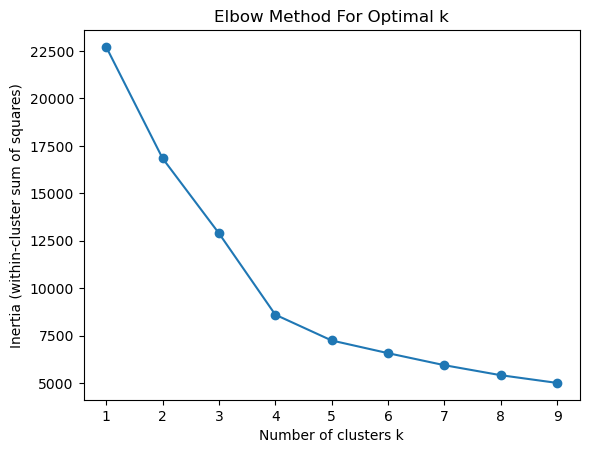

krange: range(1, 10) inertia: [22712.0, 16841.401128176047, 12890.544591347722, 8601.006160620163, 7240.703334952218, 6572.343710972669, 5938.202849994463, 5410.767484459726, 5003.853117113831]


In [29]:
# --- Step 1: Filter out any rows with non-positive values ---
# Because log10 can't be computed for zero or negative numbers
df_all = df_all[
    (df_all['Displacement, mm'] > 0) &
    (df_all['Duration, hrs'] > 0) &
    (df_all['Maximum velocity, m/s'] > 0)
].copy()  # .copy() to avoid SettingWithCopyWarning later

# --- Step 2: Log-transform the three axes ---
# This puts all three features on a logarithmic scale, which is
# more appropriate for physical data spanning orders of magnitude
df_all['log_disp'] = np.log10(df_all['Displacement, mm'])
df_all['log_dur']  = np.log10(df_all['Duration, hrs'])
df_all['log_vel']  = np.log10(df_all['Maximum velocity, m/s'])

# --- Step 3: Extract the log-transformed features as a NumPy array for clustering ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_all[['log_disp', 'log_dur', 'log_vel']])

# Include Sampling rate as a raw feature
features = ['log_disp', 'log_dur', 'log_vel', 'Sampling rate, s']

# Extract and scale
X = df_all[features].values
X_scaled = StandardScaler().fit_transform(X)

inertia = []
K_range = range(1, 10)  # or higher

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters k')
plt.ylabel('Inertia (within-cluster sum of squares)')
plt.title('Elbow Method For Optimal k')
plt.show()
print('krange:',K_range,'inertia:',inertia)



In [43]:
print("Scaler mean shape:", scaler.mean_.shape)
print("Centroids shape:", kmeans.cluster_centers_.shape)


Scaler mean shape: (3,)
Centroids shape: (3, 4)


In [54]:
features = ['log_disp', 'log_dur', 'log_vel', 'Sampling rate, s']
X = df_all[features].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=0, n_init=10)
kmeans.fit(X_scaled)

centroids_scaled = kmeans.cluster_centers_
centroids_log = scaler.inverse_transform(centroids_scaled)

# The first 3 columns are log10 of the variables, invert those:
centroids_orig = np.copy(centroids_log)
centroids_orig[:, :3] = 10 ** centroids_orig[:, :3]

print(centroids_orig)
df_all['cluster'] = kmeans.fit_predict(X_scaled) 

[[1.11610015e-01 1.45430995e+01 4.12130623e-08 4.30685657e+02]
 [7.19525543e-01 1.89590797e+02 5.47806587e-08 5.80968867e+02]
 [3.35710871e-01 1.53027721e+02 2.42770361e-09 3.56450296e+03]
 [9.25267712e-01 1.83620089e+01 3.63531725e-07 5.33800999e+02]]


In [57]:
# How many points in each cluster?
print(df_all['cluster'].value_counts())

# Summary stats by cluster
print(df_all.groupby('cluster')[['Displacement, mm', 'Duration, hrs', 'Maximum velocity, m/s','Sampling rate, s']].describe())


from sklearn.metrics import silhouette_score
score = silhouette_score(X_scaled, df_all['cluster'])
print(f'Silhouette score: {score:.3f}')


cluster
0    2477
3    1705
1    1327
2     169
Name: count, dtype: int64
        Displacement, mm                                                 \
                   count      mean       std       min       25%    50%   
cluster                                                                   
0                 2477.0  0.147161  0.109809  0.020092  0.062238  0.120   
1                 1327.0  1.141499  1.662807  0.061892  0.380000  0.670   
2                  169.0  0.530422  0.678989  0.050807  0.173000  0.346   
3                 1705.0  1.284065  1.225182  0.055310  0.540000  0.850   

                             Duration, hrs              ...  \
              75%        max         count        mean  ...   
cluster                                                 ...   
0        0.199301   0.770000        2477.0   22.773078  ...   
1        1.296290  26.829990        1327.0  590.992893  ...   
2        0.620000   4.705000         169.0  269.879684  ...   
3        1.695000  14.

In [51]:
'''

k = df_all['cluster'].nunique()  # number of clusters
colours = cmap(np.linspace(0, 1, k))

markers = {
    'creeplet': 'o',       # circle
    'creep_event': 's',    # square
    'surge': '^',          # triangle up
    'other': 'x'           # cross if needed
}

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for c in range(k):
    cluster_points = df_all[df_all['cluster'] == c]
    cluster_color = colours[c]

    for event_type, marker in markers.items():
        subset = cluster_points[cluster_points['event_type'] == event_type]
        if not subset.empty:
            ax.scatter(
                np.log10(subset['Displacement, mm']),
                np.log10(subset['Duration, hrs']),
                np.log10(subset['Maximum velocity, m/s']),
                label=f'Cluster {c} - {event_type}',
                marker=marker,
                alpha=0.7,
                s=40,
                color=cluster_color
            )

ax.set_xlabel('log10 Displacement (mm)')
ax.set_ylabel('log10 Duration (hrs)')
ax.set_zlabel('log10 Max velocity (m/s)')
ax.legend(loc='best', fontsize='small', ncol=2)
plt.show()
'''

"\n\nk = df_all['cluster'].nunique()  # number of clusters\ncolours = cmap(np.linspace(0, 1, k))\n\nmarkers = {\n    'creeplet': 'o',       # circle\n    'creep_event': 's',    # square\n    'surge': '^',          # triangle up\n    'other': 'x'           # cross if needed\n}\n\nfig = plt.figure()\nax = fig.add_subplot(111, projection='3d')\n\nfor c in range(k):\n    cluster_points = df_all[df_all['cluster'] == c]\n    cluster_color = colours[c]\n\n    for event_type, marker in markers.items():\n        subset = cluster_points[cluster_points['event_type'] == event_type]\n        if not subset.empty:\n            ax.scatter(\n                np.log10(subset['Displacement, mm']),\n                np.log10(subset['Duration, hrs']),\n                np.log10(subset['Maximum velocity, m/s']),\n                label=f'Cluster {c} - {event_type}',\n                marker=marker,\n                alpha=0.7,\n                s=40,\n                color=cluster_color\n            )\n\nax.set_xl

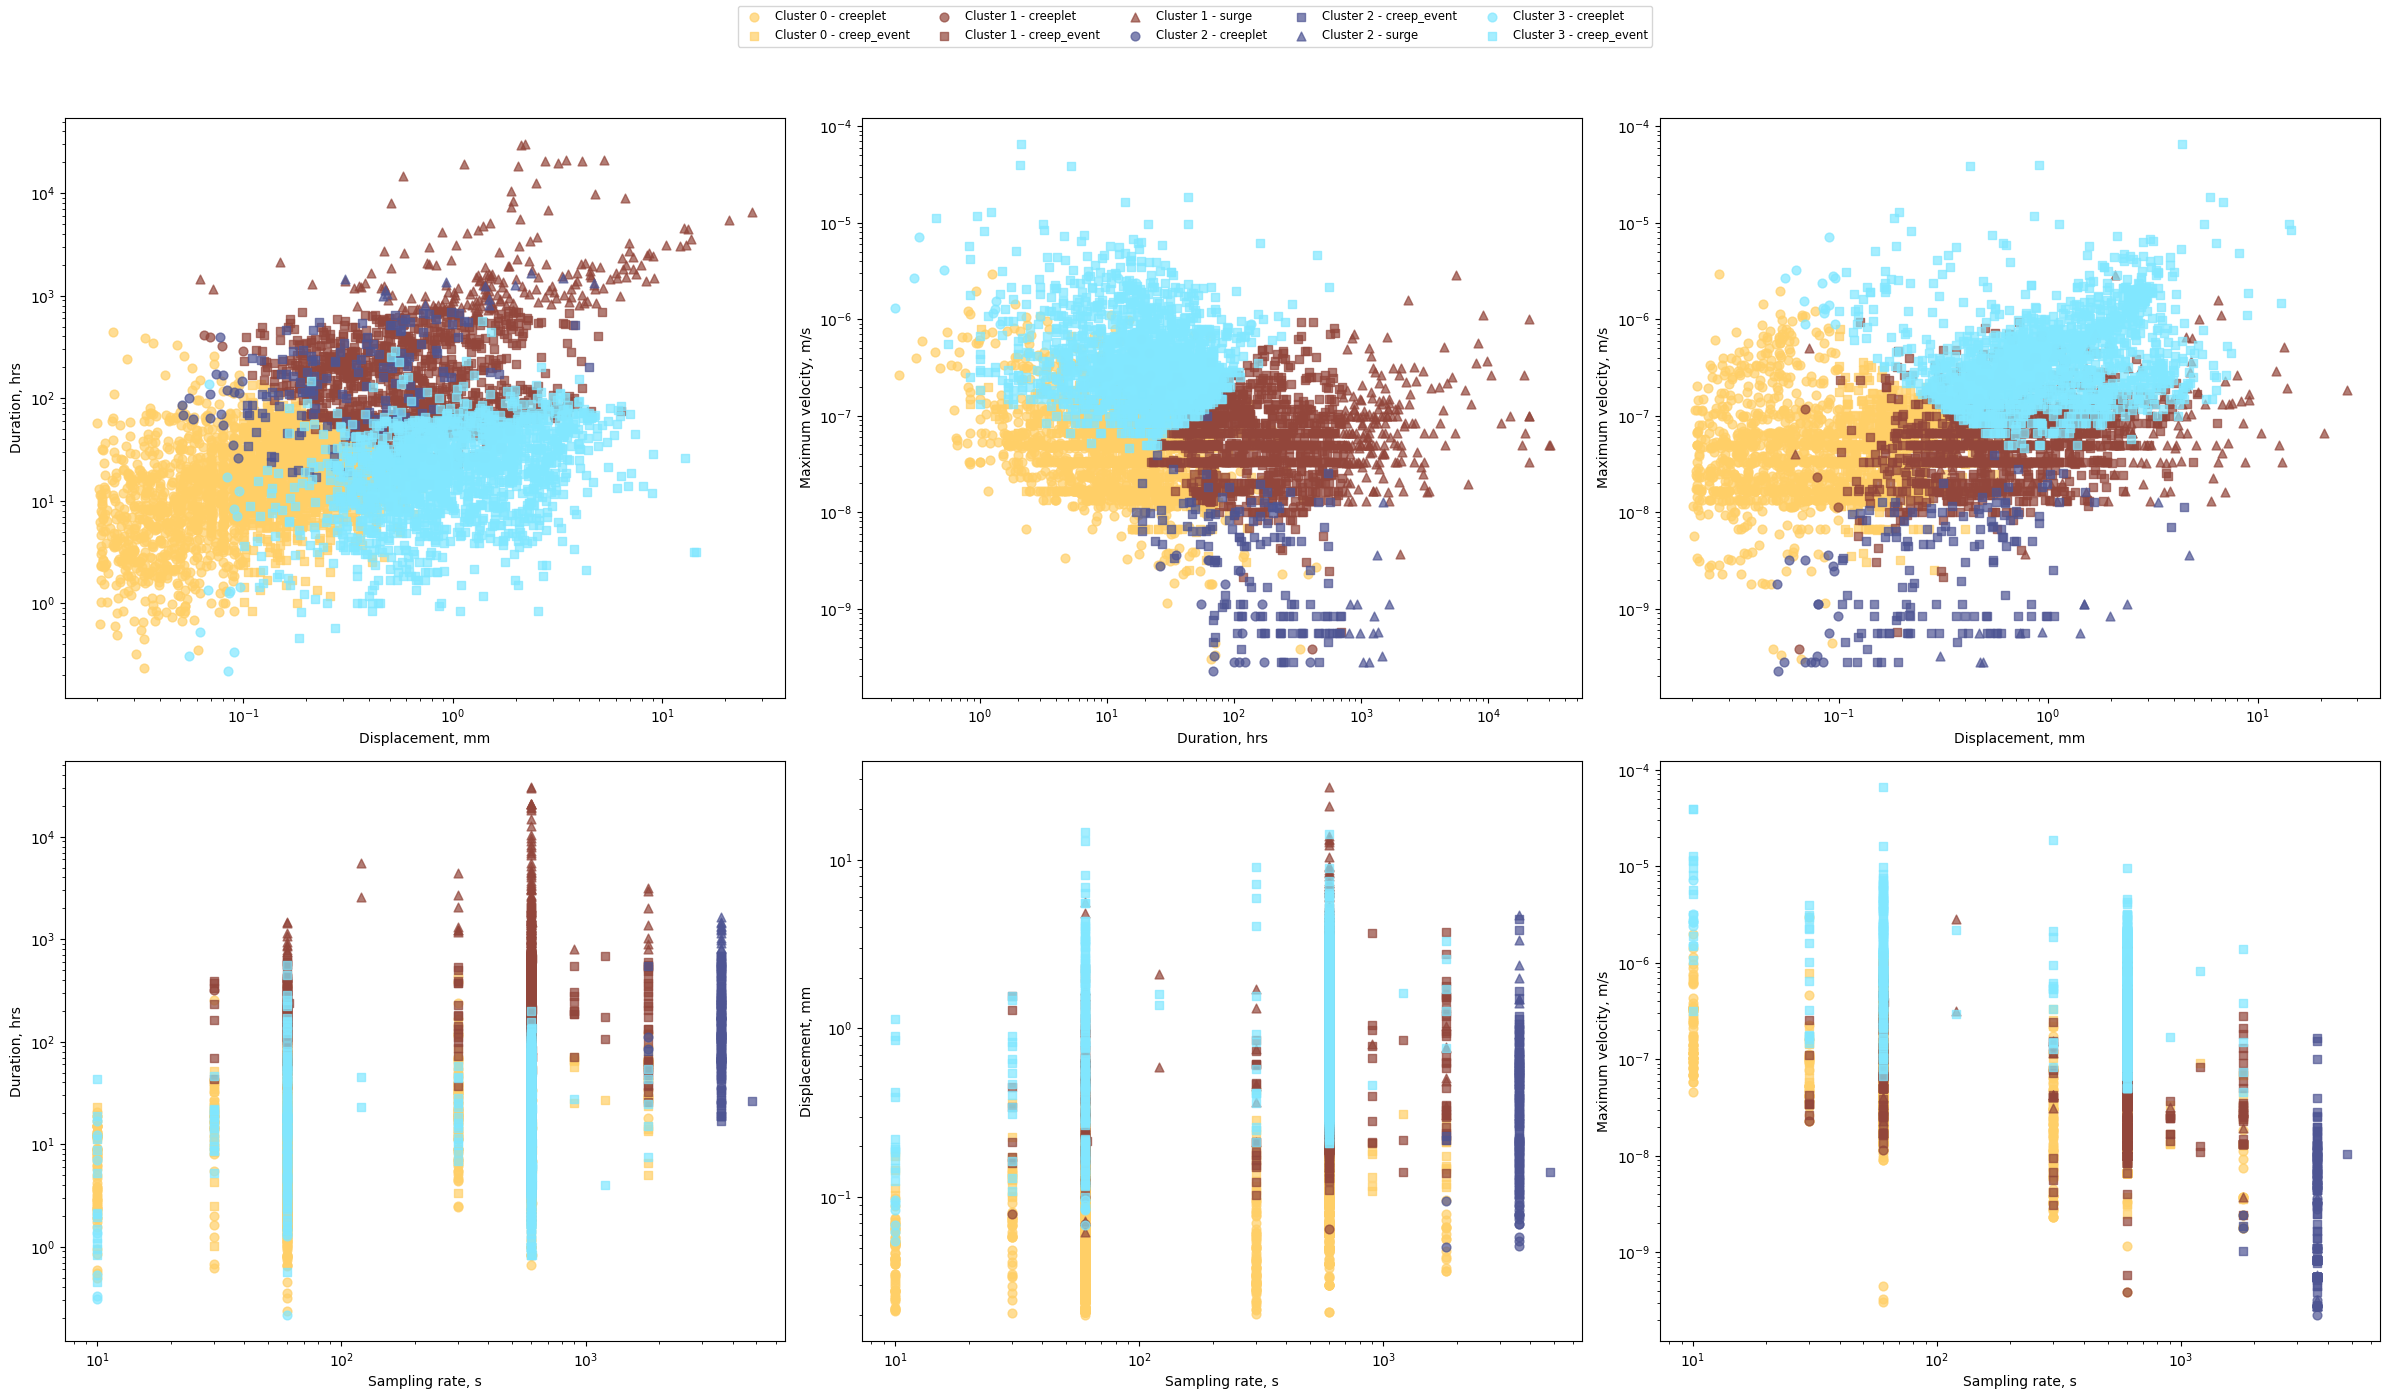

In [59]:
import matplotlib.pyplot as plt
import numpy as np
fig, axs = plt.subplots(2, 3, figsize=(24, 14))  # 2 rows x 3 cols grid

# Define all pairs to plot: original three + sampling rate vs each variable
pairs = [
    ('Displacement, mm', 'Duration, hrs'),
    ('Duration, hrs', 'Maximum velocity, m/s'),
    ('Displacement, mm', 'Maximum velocity, m/s'),
    ('Sampling rate, s', 'Duration, hrs'),
    ('Sampling rate, s', 'Displacement, mm'),
    ('Sampling rate, s', 'Maximum velocity, m/s'),
]

k = df_all['cluster'].nunique()
cmap = cmc.managua
colours = cmap(np.linspace(0, 1, k))

markers = {
    'creeplet': 'o',
    'creep_event': 's',
    'surge': '^',
    'other': 'x'
}

for ax, (x_var, y_var) in zip(axs.flatten(), pairs):
    for c in range(k):
        cluster_points = df_all[df_all['cluster'] == c]
        cluster_color = colours[c]

        for event_type, marker in markers.items():
            subset = cluster_points[cluster_points['event_type'] == event_type]
            if not subset.empty:
                ax.scatter(
                    subset[x_var],
                    subset[y_var],
                    label=f'Cluster {c} - {event_type}',
                    marker=marker,
                    alpha=0.7,
                    s=40,
                    color=cluster_color
                )
    ax.set_xlabel(x_var)
    ax.set_ylabel(y_var)

    # Use log scale only if both axes are strictly positive (avoid errors)
    if (df_all[x_var] > 0).all() and (df_all[y_var] > 0).all():
        ax.set_xscale('log')
        ax.set_yscale('log')

# Manage legend: one common legend outside the plots
handles, labels = axs[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=5, fontsize='small')

plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()


In [60]:
from sklearn.metrics import adjusted_rand_score

X = X_scaled  # your scaled features, e.g. ['log_disp', 'log_dur', 'log_vel', 'Sampling rate, s']

n_bootstraps = 20       # number of bootstrap samples
sample_fraction = 0.8   # fraction of data sampled per bootstrap
n_clusters = 3          # same k as your main clustering

clusterings = []

for seed in range(n_bootstraps):
    # sample indices without replacement
    idx = np.random.choice(len(X), int(sample_fraction * len(X)), replace=False)
    X_sample = X[idx]

    # cluster the subset
    kmeans = KMeans(n_clusters=n_clusters, random_state=seed, n_init=10)
    labels = kmeans.fit_predict(X_sample)
    clusterings.append((idx, labels))

# compare clusterings pairwise on overlapping points
ari_scores = []

for i in range(len(clusterings)):
    for j in range(i + 1, len(clusterings)):
        idx_i, labels_i = clusterings[i]
        idx_j, labels_j = clusterings[j]

        # find common indices in both bootstrap samples
        common_idx = np.intersect1d(idx_i, idx_j)
        if len(common_idx) == 0:
            continue

        # get positions of these common indices within each sample
        pos_i = np.nonzero(np.isin(idx_i, common_idx))[0]
        pos_j = np.nonzero(np.isin(idx_j, common_idx))[0]

        # compute ARI between cluster labels of common points
        score = adjusted_rand_score(labels_i[pos_i], labels_j[pos_j])
        ari_scores.append(score)

print(f"Bootstrap clustering stability:")
print(f"Mean Adjusted Rand Index (ARI): {np.mean(ari_scores):.3f}")
print(f"Min ARI: {np.min(ari_scores):.3f}, Max ARI: {np.max(ari_scores):.3f}")


Bootstrap clustering stability:
Mean Adjusted Rand Index (ARI): 0.000
Min ARI: -0.002, Max ARI: 0.004


PCA retained 3 components explaining 0.95 of variance


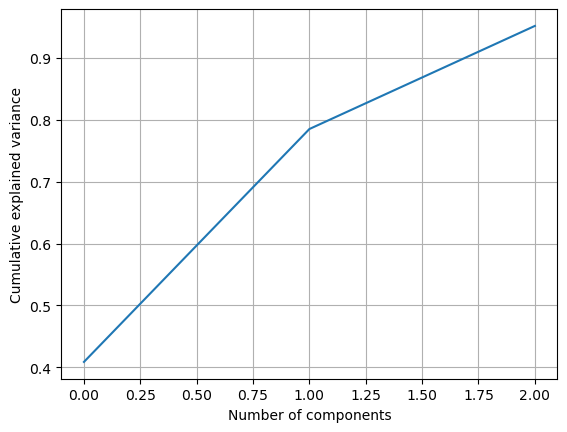

Silhouette score on PCA space: 0.349


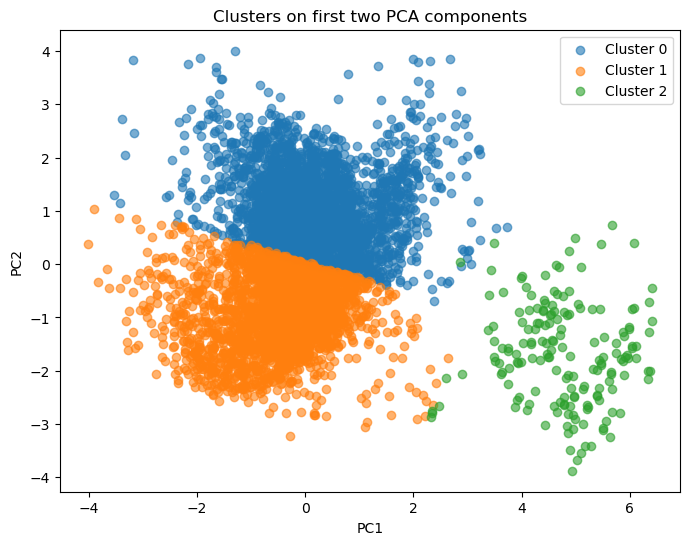

In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Assume df_all already loaded and filtered, with log-transformed features plus 'Sampling rate, s'
features = ['log_disp', 'log_dur', 'log_vel', 'Sampling rate, s']
df_all = df_all.reset_index(drop=True)

# 1. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_all[features])

# 2. Apply PCA, keep enough components to explain ~90% variance
pca = PCA(n_components=0.9, svd_solver='full')
X_pca = pca.fit_transform(X_scaled)

print(f"PCA retained {X_pca.shape[1]} components explaining {pca.explained_variance_ratio_.sum():.2f} of variance")

# Optional: plot cumulative explained variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.grid(True)
plt.show()

# 3. Run KMeans clustering on PCA components
k = 3  # or use elbow method to choose k
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
df_all['cluster_pca'] = kmeans.fit_predict(X_pca)

# 4. Check silhouette score if you want
from sklearn.metrics import silhouette_score
score = silhouette_score(X_pca, df_all['cluster_pca'])
print(f'Silhouette score on PCA space: {score:.3f}')

# 5. Plot clusters on first two PCA components
plt.figure(figsize=(8,6))
for c in range(k):
    subset = df_all[df_all['cluster_pca'] == c]
    plt.scatter(X_pca[subset.index, 0], X_pca[subset.index, 1], label=f'Cluster {c}', alpha=0.6)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.title('Clusters on first two PCA components')
plt.show()


In [64]:
print(pca.components_)


[[ 0.24041889  0.59649586 -0.45555051  0.61552025]
 [ 0.73611922  0.27862859  0.60730118 -0.10807346]
 [ 0.16186899 -0.63683218  0.22405809  0.71975077]]


In [65]:
import pandas as pd
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=['log_disp', 'log_dur', 'log_vel', 'log_srate'])
print(loadings)


ValueError: Shape of passed values is (4, 3), indices imply (4, 2)